In [1]:
import pandas as pd
import numpy as np

#Odczytaj plik 2017_jun_final.csv przy użyciu metody read_csv

table = pd.read_csv("bestsellers.csv")
print(table)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [2]:
print(table.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [3]:
table_size = table.shape
print(table_size)


(550, 7)


In [ ]:
O ilu książkach przechowywane są dane w zbiorze danych? Odpowiedź:550

In [4]:
table.columns =  ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(table.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [5]:
print(table.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [ ]:
Czy są jakieś zmienne z brakującymi wartościami? Odpowiedź: Nie

In [6]:
unique_genres =table["genre"].unique()
print(unique_genres)

['Non Fiction' 'Fiction']


In [ ]:
Jakie są unikalne gatunki? Non Fiction, Fiction

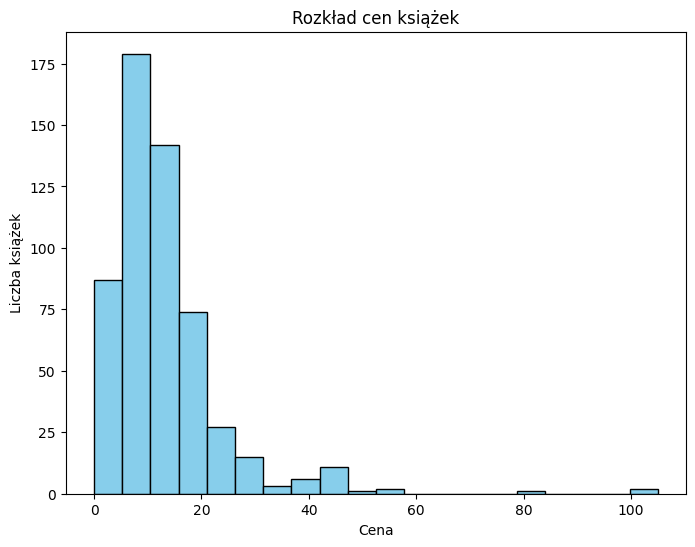

In [7]:
import matplotlib.pyplot as plt

# Ustawienie rozmiaru wykresu
plt.figure(figsize=(8, 6))

# Budowa histogramu cen
table['price'].plot.hist(bins=20, color='skyblue', edgecolor='black')

# Dodanie tytułu i etykiety osi
plt.title('Rozkład cen książek')
plt.xlabel('Cena')
plt.ylabel('Liczba książek')

# Wyświetlenie wykresu
plt.show()

In [10]:
min_price =table['price'].min()
print("Minimalna cena:", min_price)

Minimalna cena: 0


In [12]:
mean_price = table['price'].mean()
print("Średnia cena:", mean_price)

Średnia cena: 13.1


In [14]:
median_price = table['price'].median()
print("Mediana ceny:", median_price)

Mediana ceny: 11.0


In [15]:
max_price = table['price'].max()
print("Maksymalna cena:", max_price)

Maksymalna cena: 105


In [16]:
highest_rate = table['user_rating'].max()
print("Jaka jest najwyższa ocena w zbiorze danych? Odpowiedź:", highest_rate)

Jaka jest najwyższa ocena w zbiorze danych? Odpowiedź: 4.9


In [21]:
books_with_max_rating = table[table['user_rating'] == highest_rate].shape[0]
print("Ile książek ma taką ocenę? Odpowiedź:", books_with_max_rating)

Ile książek ma taką ocenę? Odpowiedź: 52


In [22]:
max_reviews_index = table['reviews'].idxmax()

book_with_max_reviews = table.loc[max_reviews_index]

print(" Która książka ma najwięcej recenzji? Odpowiedź:" , book_with_max_reviews)

 Która książka ma najwięcej recenzji? Odpowiedź: name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


In [24]:
top_50_2015 = table[(table['year'] == 2015)]
most_expensive_book_2015 = top_50_2015.loc[top_50_2015['price'].idxmax()]

print("Która z książek z Top 50 w 2015 roku jest najdroższa (możesz użyć pośredniej ramki danych)? Odpowiedź:", most_expensive_book_2015)

Która z książek z Top 50 w 2015 roku jest najdroższa (możesz użyć pośredniej ramki danych)? Odpowiedź: name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object


In [27]:
fiction_books = ((table['genre'] == 'Fiction') & (table['year'] == 2010))
FIRST_50 = table[fiction_books].shape[0]
print("Ile książek z gatunku Fiction znalazło się w Top 50 w 2010 roku (użyj &)? Odpowiedź:", FIRST_50)

Ile książek z gatunku Fiction znalazło się w Top 50 w 2010 roku (użyj &)? Odpowiedź: 20


In [30]:
rate_condition = ((table['user_rating'] == 4.9) & (table['year'].isin([2010, 2011])))
after_condition = table[rate_condition].shape[0]
print(" Ile książek z oceną 4,9 znalazło się w rankingu w 2010 i 2011 roku? Odpowiedź:", after_condition)

 Ile książek z oceną 4,9 znalazło się w rankingu w 2010 i 2011 roku? Odpowiedź: 1


In [39]:
eight_dollars = ((table['price'] < 8) & (table['year'] == 2015))
eight_dollars_books = table[eight_dollars].sort_values(by = 'price')
print("Która książka jest ostatnia na posortowanej liście? Odpowiedź:", eight_dollars_books.iloc[-1])

Która książka jest ostatnia na posortowanej liście? Odpowiedź: name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object


In [42]:
fiction_books = table[table['genre'] == 'Fiction']
genre_max_price = fiction_books.groupby('genre')['price'].agg(['max'])
print( "Maksymalna cena dla gatunku Fiction: Odpowiedź", genre_max_price)

Maksymalna cena dla gatunku Fiction: Odpowiedź          max
genre       
Fiction   82


In [45]:
fiction_books = table[table['genre'] == 'Fiction']
genre_min_price = fiction_books.groupby('genre')['price'].agg(['min'])
print( "Minimalna cena dla gatunku Fiction: Odpowiedź", genre_min_price)

Maksymalna cena dla gatunku Fiction: Odpowiedź          min
genre       
Fiction    0


In [46]:
non_fiction_books = table[table['genre'] == 'Non Fiction']
genre_max_price = non_fiction_books.groupby('genre')['price'].agg(['max'])
print( "Maksymalna cena dla gatunku Non Fiction: Odpowiedź", genre_max_price)

Maksymalna cena dla gatunku Non Fiction: Odpowiedź              max
genre           
Non Fiction  105


In [47]:
genre_min_price = non_fiction_books.groupby('genre')['price'].agg(['min'])
print( "Minimalna cena dla gatunku Non Fiction: Odpowiedź", genre_min_price)

Minimalna cena dla gatunku Non Fiction: Odpowiedź              min
genre           
Non Fiction    0


In [48]:
author_book_counts = table.groupby('author').agg({'name': 'count'}).reset_index()

author_book_counts = author_book_counts.rename(columns={'name': 'book_count'})

print("Ramka danych zawierająca liczbę książek dla każdego autora:", author_book_counts)



Ramka danych zawierająca liczbę książek dla każdego autora:                          author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


In [50]:
table_shape = author_book_counts.shape
print("Jaki jest wymiar tabeli? Odpowiedź:", table_shape)

Jaki jest wymiar tabeli? Odpowiedź: (248, 2)


In [51]:
author_with_most_books = author_book_counts.sort_values(by='book_count', ascending=False).iloc[0]

print("Autor z największą liczbą książek:", author_with_most_books['author'])

Autor z największą liczbą książek: Jeff Kinney


In [52]:
print("Ile jest książek tego autora? Odpowiedź:", author_with_most_books['book_count'])

Ile jest książek tego autora? Odpowiedź: 12


In [57]:
author_avg_rating = table.groupby('author')['user_rating'].mean().reset_index()
author_with_lowest_avg_rating = author_avg_rating.sort_values(by='user_rating').iloc[0]

print("Który autor ma najniższą średnią ocenę? Odpowiedź:", author_with_lowest_avg_rating['author'])

Który autor ma najniższą średnią ocenę? Odpowiedź: Donna Tartt


In [59]:
lowest_avg_rating = author_with_lowest_avg_rating['user_rating']

print("Średnia ocena tego autora:", lowest_avg_rating)

Średnia ocena tego autora: 3.9


In [63]:
merged_data = pd.merge(author_book_counts, author_avg_rating, on='author', how='inner')


print(merged_data)

                         author  book_count  user_rating
0              Abraham Verghese           2     4.600000
1                Adam Gasiewski           1     4.400000
2                 Adam Mansbach           1     4.800000
3                     Adir Levy           1     4.800000
4    Admiral William H. McRaven           1     4.700000
..                          ...         ...          ...
243             Walter Isaacson           3     4.566667
244               William Davis           2     4.400000
245            William P. Young           2     4.600000
246            Wizards RPG Team           3     4.800000
247                Zhi Gang Sha           2     4.600000

[248 rows x 3 columns]


In [65]:
merged_data_sorted = merged_data.sort_values(by=['book_count', 'user_rating'])
print(merged_data_sorted)

                                 author  book_count  user_rating
171                      Muriel Barbery           1     4.000000
43                         Chris Cleave           1     4.100000
109                   Ian K. Smith M.D.           1     4.100000
186                        Pierre Dukan           1     4.100000
81                     Elizabeth Strout           1     4.200000
..                                  ...         ...          ...
11   American Psychological Association          10     4.500000
226                     Suzanne Collins          11     4.663636
92                         Gary Chapman          11     4.736364
197                        Rick Riordan          11     4.772727
120                         Jeff Kinney          12     4.800000

[248 rows x 3 columns]


In [66]:
print("Który autor jest pierwszy na liście? Odpowiedź:", merged_data_sorted.iloc[0])

Który autor jest pierwszy na liście? Odpowiedź: author         Muriel Barbery
book_count                  1
user_rating               4.0
Name: 171, dtype: object
